# <center>`LightGBM Classifier`</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lightgbm
print('LightGBM version:', lightgbm.__version__)
from sklearn import metrics

LightGBM version: 4.5.0


# 2. Load `magic_gamma_telescope` dataset

In [2]:
df = pd.read_csv('magic_gamma_telescope.csv')
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df.shape

(19020, 11)

In [4]:
df.isna().any()

fLength     False
fWidth      False
fSize       False
fConc       False
fConc1      False
fAsym       False
fM3Long     False
fM3Trans    False
fAlpha      False
fDist       False
class       False
dtype: bool

In [5]:
df['class'].unique() # g=gamma(signal) # h=hadron(background)

array(['g', 'h'], dtype=object)

In [6]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

# 3. Perform preprocessing

In [7]:
df['class'] = df['class'].apply(lambda x: 0 if x == 'h' else 1)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# 4. Separate features and classes

In [8]:
X = df.iloc[:, :-1]
y = df.loc[:, 'class']

# 5. Split the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=1)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(14265, 4755, 14265, 4755)

# 6. Apply `LightGBM Classifier`

In [11]:
lgb = lightgbm.LGBMClassifier(force_col_wise=True, random_state=1)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 9235, number of negative: 5030
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 14265, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.647389 -> initscore=0.607581
[LightGBM] [Info] Start training from score 0.607581


LGBMClassifier(force_col_wise=True, random_state=1)

In [12]:
y_train.value_counts()

1    9235
0    5030
Name: class, dtype: int64

In [13]:
print('Accuracy on the train set:', round(lgb.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(lgb.score(X_test, y_test), 4))

Accuracy on the train set: 0.9249
Accuracy on the test set: 0.8822


# 7. Plot `confusion_matrix`

In [14]:
y_pred = lgb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm , display_labels=lgb.classes_)

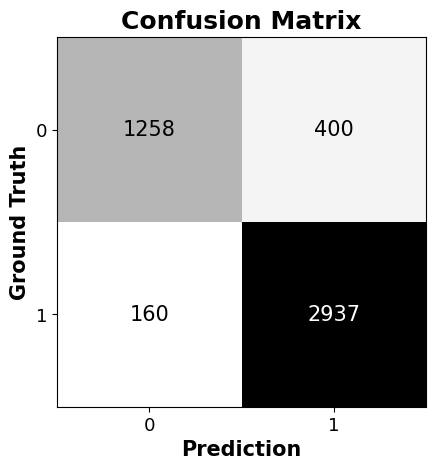

In [15]:
disp.plot(cmap='Greys', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [16]:
y_test.value_counts()

1    3097
0    1658
Name: class, dtype: int64

In [17]:
cat_labels = ['h', 'g']
y_pred = lgb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm , display_labels=cat_labels)

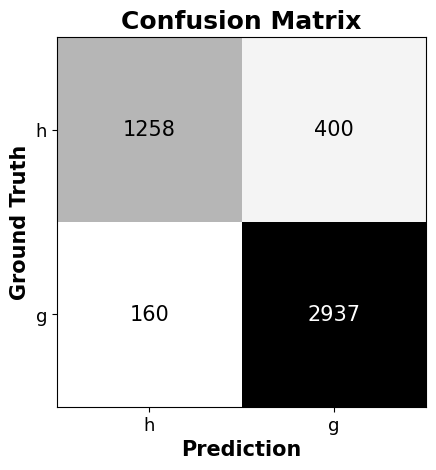

In [18]:
disp.plot(cmap='Greys', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [19]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))

F1 score: 0.913
Jaccard score: 0.8399


# 8. Print `classification_report`

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1658
           1       0.88      0.95      0.91      3097

    accuracy                           0.88      4755
   macro avg       0.88      0.85      0.87      4755
weighted avg       0.88      0.88      0.88      4755



# 9. Feature importance

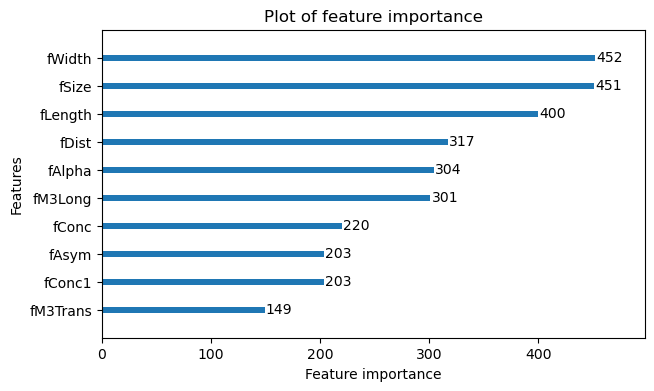

In [21]:
lightgbm.plot_importance(lgb, title='Plot of feature importance', figsize=(7, 4), grid=False);